In [21]:
import pandas as pd  

file = pd.read_csv("./dataSet/ONLINE EDUCATION SYSTEM REVIEW.csv") 
file.head(5)

,Gender,Home Location,Level of Education,Age(Years),Number of Subjects,Device type used to attend classes,Economic status,Family size,Internet facility in your locality,Are you involved in any sports?,...,Time spent on social media (Hours),Interested in Gaming?,Have separate room for studying?,Engaged in group studies?,Average marks scored before pandemic in traditional classroom,Your interaction in online mode,Clearing doubts with faculties in online mode,Interested in?,Performance in online,Your level of satisfaction in Online Education
0,Male,Urban,Under Graduate,18,11,Laptop,Middle Class,4,5,No,...,1,No,No,No,91-100,1,1,Practical,6,Average
1,Male,Urban,Under Graduate,19,7,Laptop,Middle Class,4,1,Yes,...,1,Yes,Yes,No,91-100,1,1,Theory,3,Bad
2,Male,Rural,Under Graduate,18,5,Laptop,Middle Class,5,2,No,...,1,No,Yes,No,71-80,1,1,Both,6,Bad
3,Male,Urban,Under Graduate,18,5,Laptop,Middle Class,4,4,Yes,...,2,No,No,yes,91-100,1,2,Theory,4,Bad
4,Male,Rural,Under Graduate,18,5,Laptop,Middle Class,4,3,No,...,2,Yes,Yes,yes,81-90,3,3,Both,6,Average


In [22]:
from sklearn.preprocessing import OneHotEncoder
import os
base =os.curdir
file_not_encoded = pd.read_csv("./dataSet/ONLINE EDUCATION SYSTEM REVIEW.csv") 
encoder = OneHotEncoder(sparse = False)
def one_hot_encode(column, df):
    seleted_col = df[[column]]
    encoder.fit(seleted_col)
    encoded = encoder.transform(seleted_col)
    encoded = pd.DataFrame(data=encoded,columns=encoder.categories_)
    return encoded

encode_cols = {"Gender", "Home Location", "Level of Education", "Device type used to attend classes","Economic status","Are you involved in any sports?","Interested in Gaming?","Have separate room for studying?",
"Engaged in group studies?","Interested in?","Do elderly people monitor you?","Your level of satisfaction in Online Education"}

for x in encode_cols:
    encoded_col = one_hot_encode(x,file)
    file.drop(x,axis=1,inplace =True)
    file_not_encoded.drop(x,axis=1,inplace =True)
    for y in encoded_col.columns:
        path = str(x)+str(y)
        path = str(path)
        path = path.replace("'","")
        path = path.replace(",","")
        file.insert(len(file.columns),path,encoded_col[y])
    # x.replace(" ","_")
    path = "./dataSet/encoded/"+x+".csv"
    encoded_col.to_csv(path,index=False)

file_not_encoded.to_csv("./dataSet/not-encoded-number-features.csv")
file.to_csv("./dataSet/one_hot_encoded.csv")

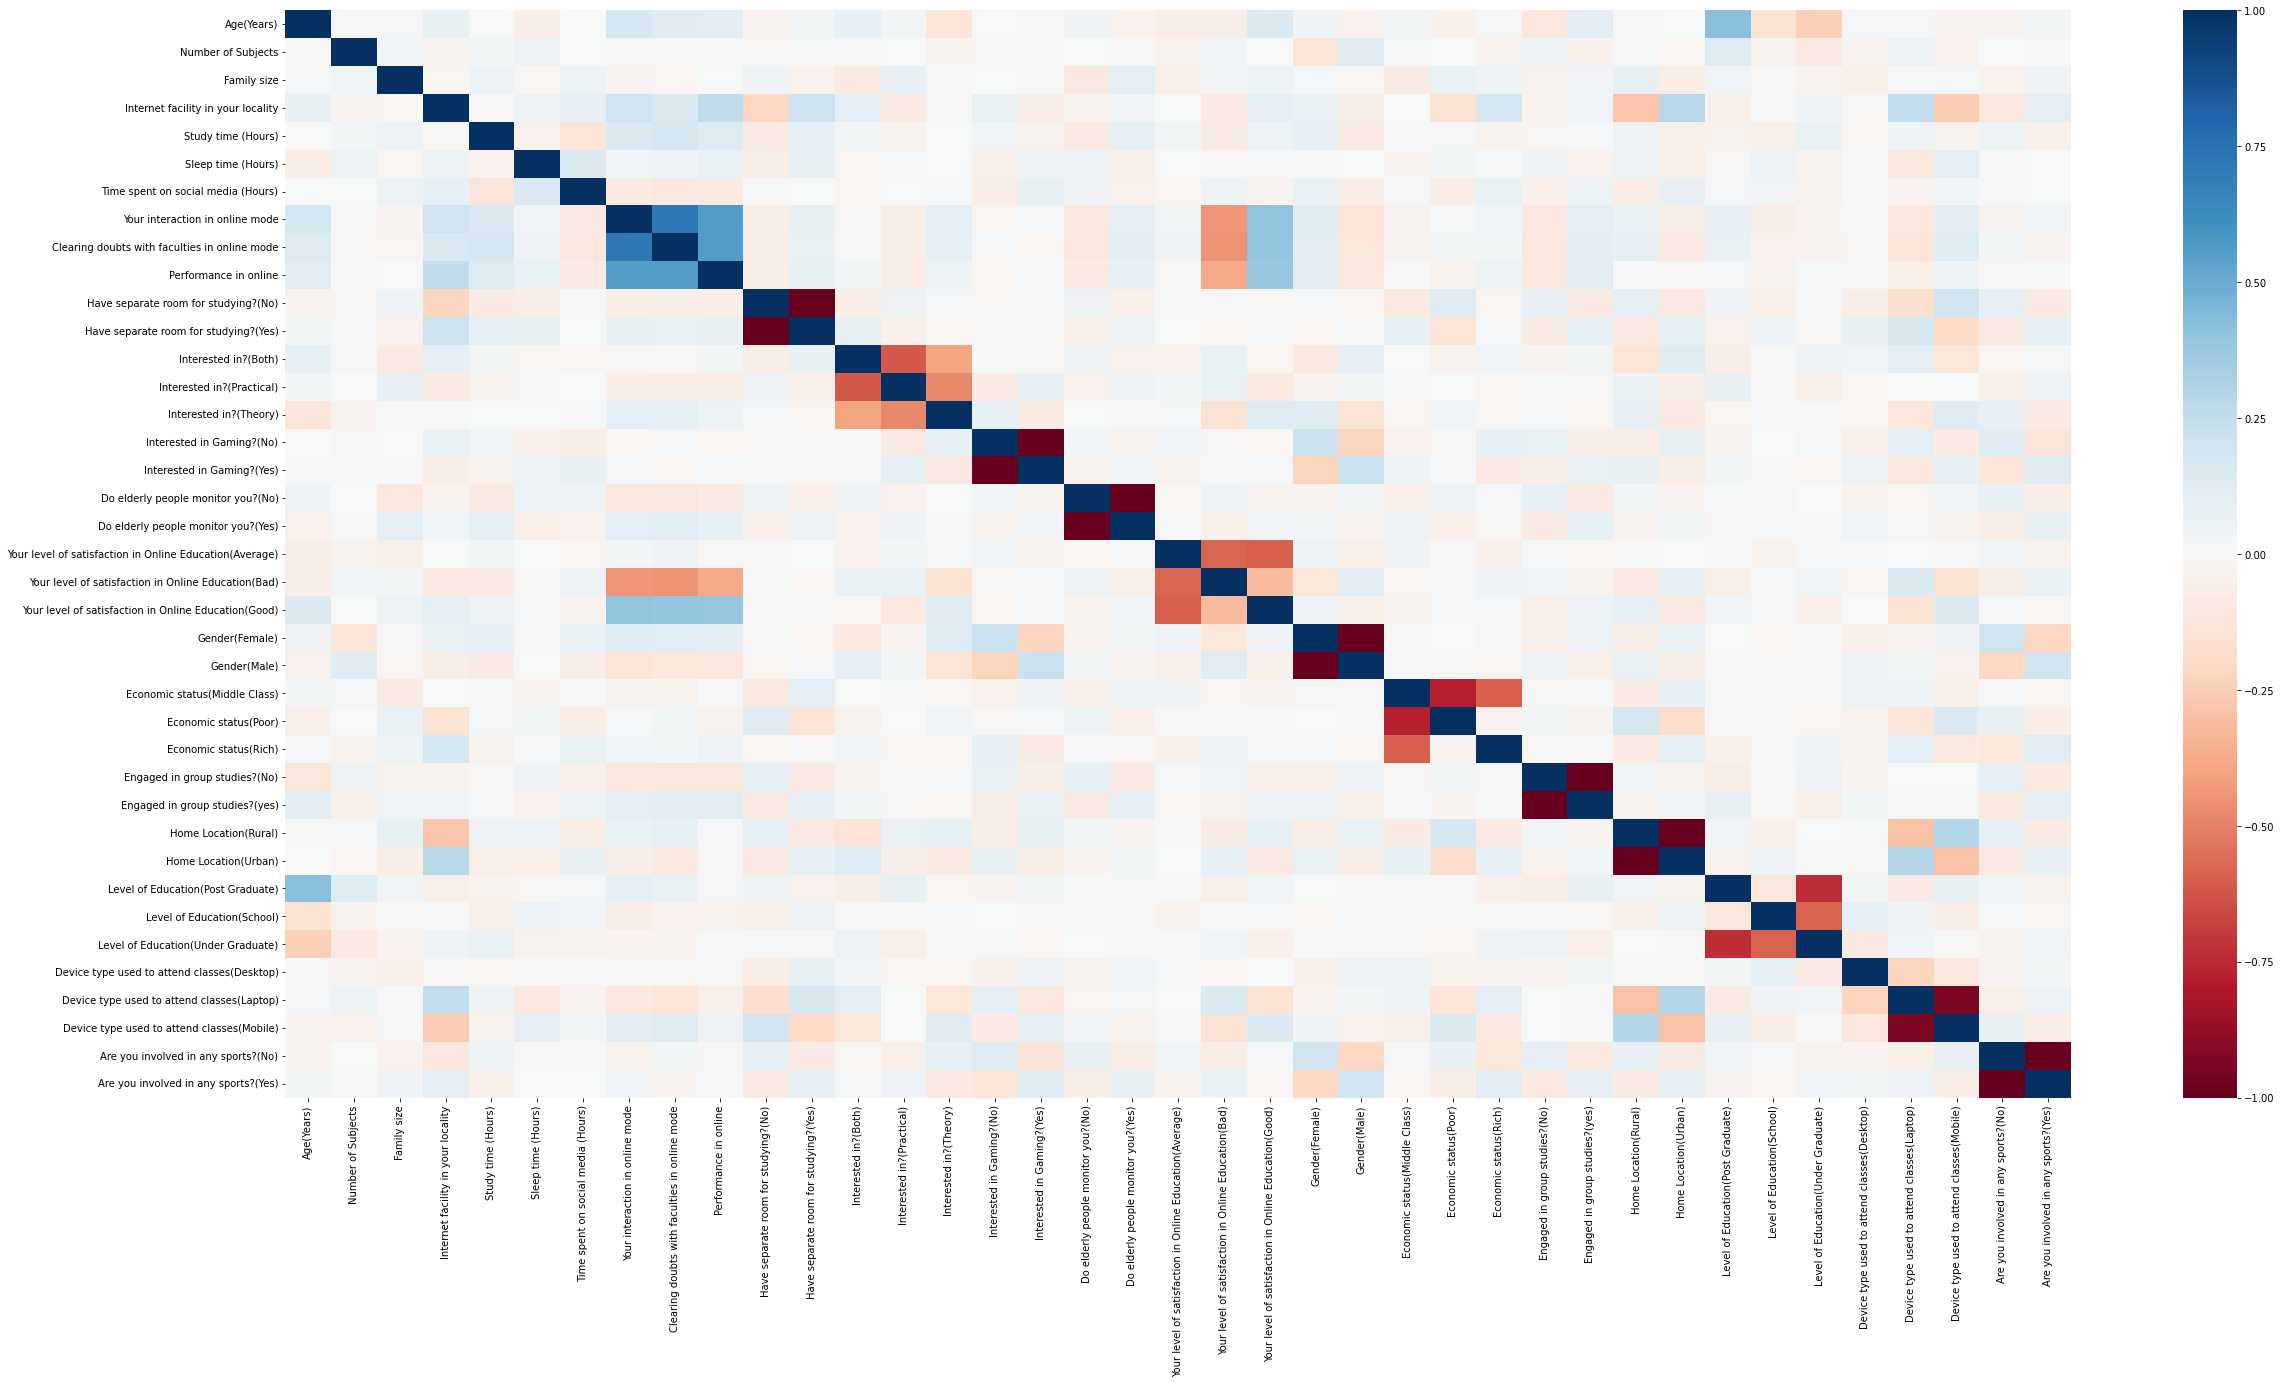

In [23]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

# df = pd.read_csv (r'auto-mpg.csv')
# df.drop('origin', axis=1, inplace=True)
plt.figure(figsize=(40,20))
corr = file.corr()
_=sns.heatmap(corr,vmin=-1,vmax=1,center=0,annot=False,cmap='RdBu')

In [32]:
var_names = list(file.columns)
print (var_names)
var_names.remove('Your level of satisfaction in Online Education(Bad)')
var_names.remove('Your level of satisfaction in Online Education(Good)')
var_names.remove('Your level of satisfaction in Online Education(Average)')
pairplot_df = file.copy()
pairplot_df.drop('Your level of satisfaction in Online Education(Average)',axis=1,inplace =True)
pairplot_df.drop('Your level of satisfaction in Online Education(Bad)',axis=1,inplace =True)
pairplot_df.drop('Your level of satisfaction in Online Education(Good)',axis=1,inplace =True)
pairplot_df.
pairplot_df.head(10)
# _=sns.pairplot(data=file,vars=var_names,
#               kind='scatter',plot_kws=dict(size=.5,alpha=.5),hue=satisfication_val)

['Age(Years)', 'Number of Subjects', 'Family size', 'Internet facility in your locality', 'Study time (Hours)', 'Sleep time (Hours)', 'Time spent on social media (Hours)', 'Average marks scored before pandemic in traditional classroom', 'Your interaction in online mode', 'Clearing doubts with faculties in online mode', 'Performance in online', 'Have separate room for studying?(No)', 'Have separate room for studying?(Yes)', 'Interested in?(Both)', 'Interested in?(Practical)', 'Interested in?(Theory)', 'Interested in Gaming?(No)', 'Interested in Gaming?(Yes)', 'Do elderly people monitor you?(No)', 'Do elderly people monitor you?(Yes)', 'Your level of satisfaction in Online Education(Average)', 'Your level of satisfaction in Online Education(Bad)', 'Your level of satisfaction in Online Education(Good)', 'Gender(Female)', 'Gender(Male)', 'Economic status(Middle Class)', 'Economic status(Poor)', 'Economic status(Rich)', 'Engaged in group studies?(No)', 'Engaged in group studies?(yes)', 'Hom

,Age(Years),Number of Subjects,Family size,Internet facility in your locality,Study time (Hours),Sleep time (Hours),Time spent on social media (Hours),Average marks scored before pandemic in traditional classroom,Your interaction in online mode,Clearing doubts with faculties in online mode,...,Home Location(Rural),Home Location(Urban),Level of Education(Post Graduate),Level of Education(School),Level of Education(Under Graduate),Device type used to attend classes(Desktop),Device type used to attend classes(Laptop),Device type used to attend classes(Mobile),Are you involved in any sports?(No),Are you involved in any sports?(Yes)
0,18,11,4,5,3,6,1,91-100,1,1,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
1,19,7,4,1,7,5,1,91-100,1,1,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
2,18,5,5,2,6,7,1,71-80,1,1,...,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
3,18,5,4,4,3,6,2,91-100,1,2,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
4,18,5,4,3,8,7,2,81-90,3,3,...,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
5,18,5,4,4,3,6,2,91-100,1,1,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
6,19,5,5,5,2,6,3,81-90,4,3,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
7,17,4,4,4,4,8,6,61-70,3,3,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
8,19,5,4,4,6,6,2,81-90,4,1,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
9,20,9,4,3,4,7,2,81-90,3,2,...,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
